In [79]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [71]:

yolo = cv2.dnn.readNet("yolov2.cfg", "yolov2-voc.weights")

In [102]:
img = cv2.imread("car.jpg")

In [111]:
def read_classes(classes_path):
    with open(classes_path, "r") as f:
        class_names = [line.strip() for line in f.readlines()]
    return class_names

classes = read_classes("coco.names")

layer_names = yolo.getLayerNames()
output_layers = [layer_names[i - 1] for i in yolo.getUnconnectedOutLayers()]
classes

['person',
 'bicycle',
 'car',
 'motorbike',
 'aeroplane',
 'bus',
 'train',
 'truck',
 'boat',
 'traffic light',
 'fire hydrant',
 'stop sign',
 'parking meter',
 'bench',
 'bird',
 'cat',
 'dog',
 'horse',
 'sheep',
 'cow',
 'elephant',
 'bear',
 'zebra',
 'giraffe',
 'backpack',
 'umbrella',
 'handbag',
 'tie',
 'suitcase',
 'frisbee',
 'skis',
 'snowboard',
 'sports ball',
 'kite',
 'baseball bat',
 'baseball glove',
 'skateboard',
 'surfboard',
 'tennis racket',
 'bottle',
 'wine glass',
 'cup',
 'fork',
 'knife',
 'spoon',
 'bowl',
 'banana',
 'apple',
 'sandwich',
 'orange',
 'broccoli',
 'carrot',
 'hot dog',
 'pizza',
 'donut',
 'cake',
 'chair',
 'sofa',
 'pottedplant',
 'bed',
 'diningtable',
 'toilet',
 'tvmonitor',
 'laptop',
 'mouse',
 'remote',
 'keyboard',
 'cell phone',
 'microwave',
 'oven',
 'toaster',
 'sink',
 'refrigerator',
 'book',
 'clock',
 'vase',
 'scissors',
 'teddy bear',
 'hair drier',
 'toothbrush']

In [97]:
def read_classes(classes_path):
    with open(classes_path, "r") as f:
        class_names = [line.strip() for line in f.readlines()]
    return class_names

classes = read_classes("coco.names")

layer_names = yolo.getLayerNames()
output_layers = [layer_names[i-1] for i in yolo.getUnconnectedOutLayers()]

In [119]:
border_color = (255, 191, 0)
text_color = (0,255,0)

def detect_object(image):
    img = cv2.imread(image)
    height, width, channels = img.shape

    blob = cv2.dnn.blobFromImage(img, 1/255.0, (512, 512), swapRB=True, crop=False)
    yolo.setInput(blob)
    outputs = yolo.forward(output_layers)
    class_ids = []
    confidences = []
    boxes = []
    for output in outputs:
        for detection in output:
            scores = detection[5:]
            class_id = np.argmax(scores)
            confidence = scores[class_id]
            if confidence > 0.5:
                center_x = int(detection[0] * width)
                center_y = int(detection[1] * height)
                w = int(detection[2] * width)
                h = int(detection[3] * height)
                x = int(center_x - w / 2)
                y = int(center_y - h / 2)

                boxes.append([x, y, w, h])
                confidences.append(float(confidence))
                class_ids.append(class_id)

    indexes = cv2.dnn.NMSBoxes(boxes, confidences, 0.5, 0.4)
    for i in range(len(boxes)):
        if i in indexes:
            x, y, w, h = boxes[i]
            label = str(classes[class_ids[i]]) + " " + str(round(confidences[i], 3))
            cv2.rectangle(img, (x, y), (x + w, y + h), border_color, 3)
            cv2.putText(img, label, (x, y - 20), cv2.FONT_HERSHEY_PLAIN, 4, text_color, 6)
    plt.figure(figsize = (20,20))
    plt.imshow(img)


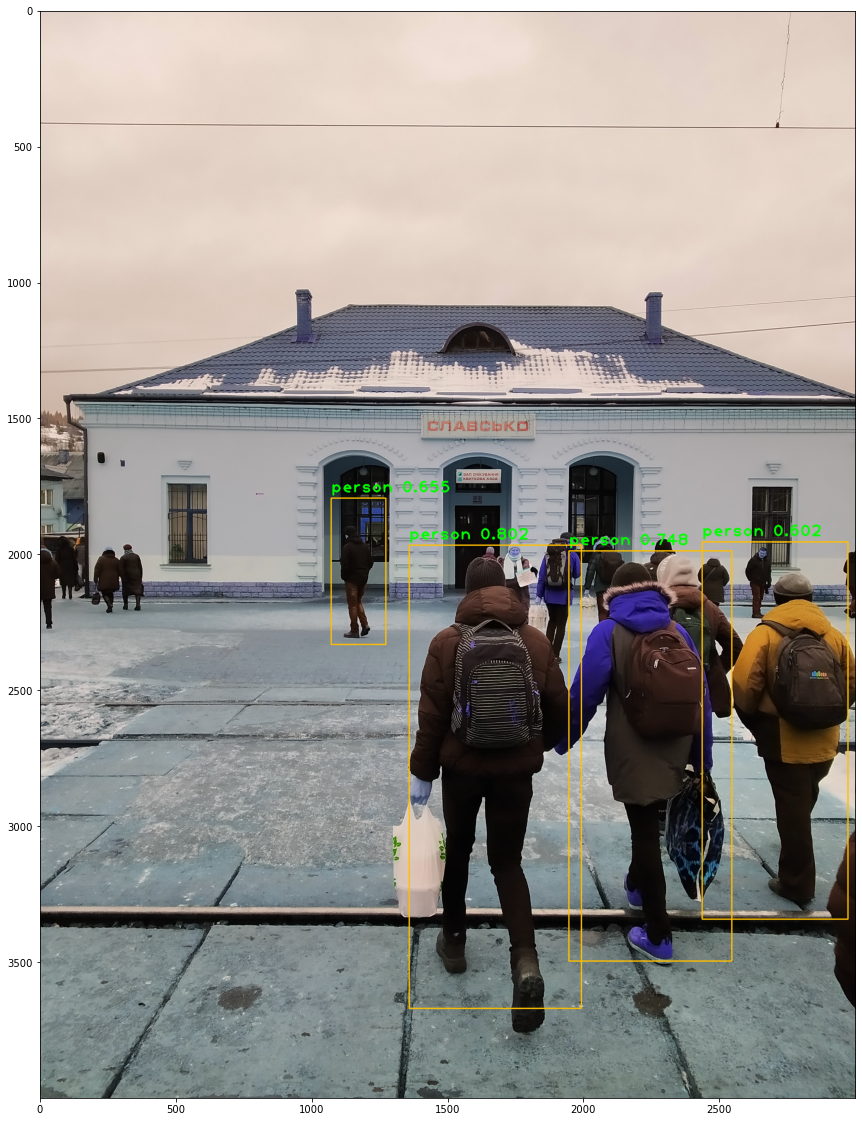

In [117]:
detect_object("pep.jpg")

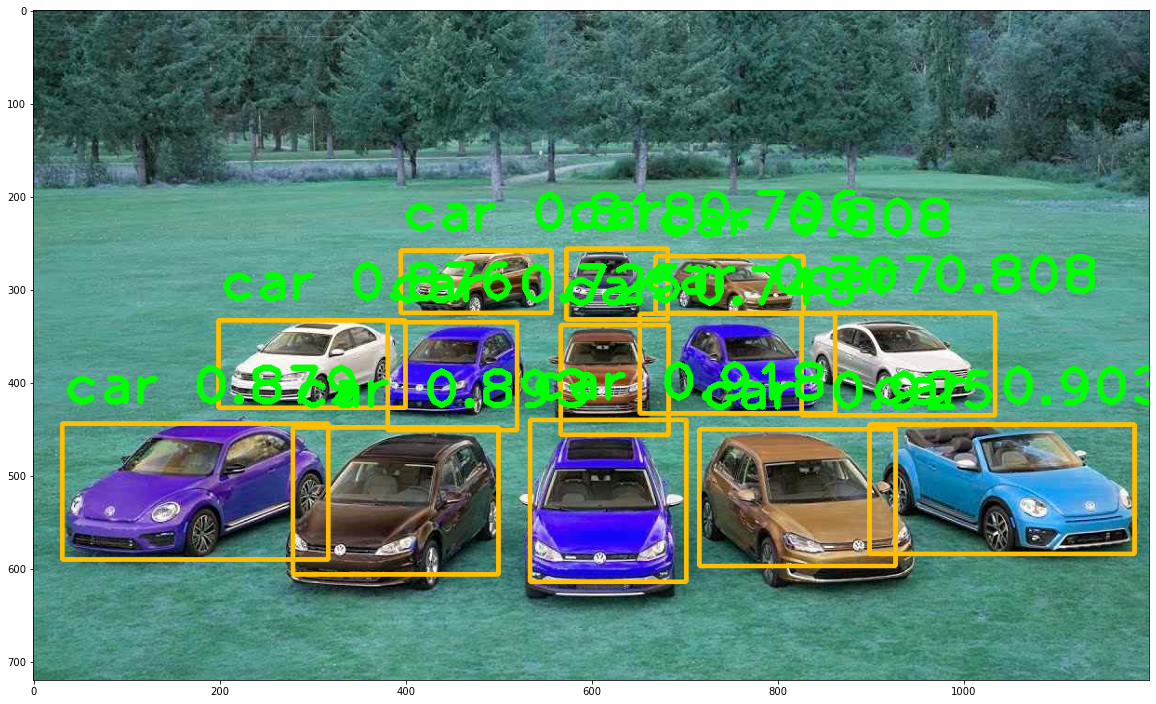

In [120]:
detect_object("car.jpg")